# Fresh Air Competition

## 0. Setting

In [77]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import pytz
import datetime
import seaborn as sns
import pandas.tseries.offsets as offsets

#pandas初期設定
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Root_dir
root_dir = "C:/Users/rkato/OneDrive/ドキュメント/01Analytics/10Competition/KDD2018"

# raw_dataディレクトリ
data_dir = root_dir + "/data"

# outputディレクトリ
out_dir = root_dir + "/output"

# figure
fig_dir = out_dir + "/fig"

# データセット
ds_dir = root_dir + "/ds"

# 出力をggplot風にする
plt.style.use('ggplot')

# グラフをインラインで表示
%matplotlib inline

height has been deprecated.



## 1. Read Data 

In [2]:
# change directory
os.chdir(data_dir)

# read data
air_1 = pd.read_csv("beijing_17_18_aq.csv", header=0)
met_1 = pd.read_csv("beijing_17_18_meo.csv", header=0)
sta_1 = pd.read_csv("Beijing_AirQuality_Stations_en.csv", header=0)

In [3]:
# check data

# Air Quality Data　
air_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311010 entries, 0 to 311009
Data columns (total 8 columns):
stationId    311010 non-null object
utc_time     311010 non-null object
PM2.5        290621 non-null float64
PM10         227747 non-null float64
NO2          292359 non-null float64
CO           268197 non-null float64
O3           290589 non-null float64
SO2          292462 non-null float64
dtypes: float64(6), object(2)
memory usage: 19.0+ MB


In [4]:
air_1.head()

,stationId,utc_time,PM2.5,PM10,NO2,CO,O3,SO2
0,aotizhongxin_aq,2017-01-01 14:00:00,453.0,467.0,156.0,7.2,3.0,9.0
1,aotizhongxin_aq,2017-01-01 15:00:00,417.0,443.0,143.0,6.8,2.0,8.0
2,aotizhongxin_aq,2017-01-01 16:00:00,395.0,467.0,141.0,6.9,3.0,8.0
3,aotizhongxin_aq,2017-01-01 17:00:00,420.0,484.0,139.0,7.4,3.0,9.0
4,aotizhongxin_aq,2017-01-01 18:00:00,453.0,520.0,157.0,7.6,4.0,9.0


In [5]:
air_1.describe()

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PM2.5,PM10,NO2,CO,O3,SO2
count,290621.000000,227747.000000,292359.000000,268197.000000,290589.000000,292462.000000
mean,58.785570,88.059259,45.792457,0.960677,55.692755,8.981003
std,66.113851,89.292875,32.065045,1.001856,53.821424,11.702594
min,2.000000,5.000000,1.000000,0.100000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,1004.000000,3000.000000,300.000000,15.000000,504.000000,307.000000


In [6]:
# Weather Data
met_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158047 entries, 0 to 158046
Data columns (total 10 columns):
station_id        158047 non-null object
longitude         158047 non-null float64
latitude          158047 non-null float64
utc_time          158047 non-null object
temperature       158047 non-null float64
pressure          158047 non-null float64
humidity          158047 non-null int64
wind_direction    157813 non-null float64
wind_speed        157813 non-null float64
weather           158047 non-null object
dtypes: float64(6), int64(1), object(3)
memory usage: 12.1+ MB


In [7]:
met_1.head()

,station_id,longitude,latitude,utc_time,temperature,pressure,humidity,wind_direction,wind_speed,weather
0,shunyi_meo,116.615278,40.126667,2017-01-30 16:00:00,-1.7,1028.7,15,215.0,1.6,Sunny/clear
1,shunyi_meo,116.615278,40.126667,2017-01-30 17:00:00,-3.5,1028.4,24,16.0,1.0,Haze
2,shunyi_meo,116.615278,40.126667,2017-01-30 18:00:00,-3.7,1028.1,27,32.0,1.1,Haze
3,shunyi_meo,116.615278,40.126667,2017-01-30 19:00:00,-3.9,1027.6,27,21.0,0.9,Haze
4,shunyi_meo,116.615278,40.126667,2017-01-30 20:00:00,-4.1,1026.7,26,17.0,1.1,Haze


In [8]:
met_1.describe()

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,longitude,latitude,temperature,pressure,humidity,wind_direction,wind_speed
count,158047.000000,158047.000000,158047.000000,158047.000000,158047.000000,157813.000000,157813.000000
mean,116.395672,40.047275,38.182775,1026.798200,354.312894,35487.471178,96.933881
std,0.395223,0.264798,5030.694816,5025.748455,17423.723518,184454.823456,9748.857634
min,115.692222,39.718611,-21.300000,940.000000,4.000000,0.000000,0.000000
25%,116.194167,39.847500,2.500000,994.200000,27.000000,NaN,NaN
50%,116.290556,39.973889,13.800000,1005.600000,48.000000,NaN,NaN
75%,116.626944,40.223333,23.200000,1016.900000,73.000000,NaN,NaN
max,117.117778,40.658889,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000


In [9]:
# Station Data
sta_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
location     35 non-null object
type         35 non-null object
station      35 non-null object
longitude    35 non-null float64
latitude     35 non-null float64
dtypes: float64(2), object(3)
memory usage: 1.4+ KB


In [10]:
sta_1.head()

,location,type,station,longitude,latitude
0,Beijing,Urban,dongsi_aq,116.417,39.929
1,Beijing,Urban,tiantan_aq,116.407,39.886
2,Beijing,Urban,guanyuan_aq,116.339,39.929
3,Beijing,Urban,wanshouxigong_aq,116.352,39.878
4,Beijing,Urban,aotizhongxin_aq,116.397,39.982


In [11]:
sta_1.describe()

,longitude,latitude
count,35.000000,35.000000
mean,116.405514,39.986543
std,0.286312,0.233840
min,115.972000,39.520000
25%,116.213500,39.869500
50%,116.368000,39.937000
75%,116.494500,40.113500
max,117.120000,40.499000


## 3. Understanding Data 

In [12]:
# staton
air_1['stationId'].value_counts()

miyunshuiku_aq       8886
nongzhanguan_aq      8886
fangshan_aq          8886
pingchang_aq         8886
nansanhuan_aq        8886
daxing_aq            8886
aotizhongxin_aq      8886
tongzhou_aq          8886
yungang_aq           8886
fengtaihuayuan_aq    8886
guanyuan_aq          8886
wanshouxigong_aq     8886
badaling_aq          8886
donggaocun_aq        8886
zhiwuyuan_aq         8886
liulihe_aq           8886
yufa_aq              8886
dongsihuan_aq        8886
beibuxinqu_aq        8886
wanliu_aq            8886
qianmen_aq           8886
huairou_aq           8886
miyun_aq             8886
mentougou_aq         8886
dingling_aq          8886
dongsi_aq            8886
shunyi_aq            8886
yongdingmennei_aq    8886
xizhimenbei_aq       8886
gucheng_aq           8886
yizhuang_aq          8886
pinggu_aq            8886
yongledian_aq        8886
tiantan_aq           8886
yanqin_aq            8886
Name: stationId, dtype: int64

In [13]:
met_1['station_id'].value_counts()

shijingshan_meo    8781
fangshan_meo       8781
zhaitang_meo       8781
shunyi_meo         8781
chaoyang_meo       8781
daxing_meo         8781
miyun_meo          8781
pingchang_meo      8781
shangdianzi_meo    8781
yanqing_meo        8781
mentougou_meo      8780
tongzhou_meo       8780
huairou_meo        8780
fengtai_meo        8780
xiayunling_meo     8780
hadian_meo         8780
pinggu_meo         8779
beijing_meo        8778
Name: station_id, dtype: int64

In [14]:
sta_1['station'].value_counts()

gucheng_aq           1
miyunshuiku_aq       1
yanqin_aq            1
yungang_aq           1
wanshouxigong_aq     1
wanliu_aq            1
pingchang_aq         1
mentougou_aq         1
yufa_aq              1
liulihe_aq           1
beibuxinqu_aq        1
qianmen_aq           1
aotizhongxin_aq      1
zhiwuyuan_aq         1
yizhuang_aq          1
shunyi_aq            1
dongsihuan_aq        1
tiantan_aq           1
daxing_aq            1
dongsi_aq            1
nongzhanguan_aq      1
fengtaihuayuan_aq    1
yongledian_aq        1
miyun_aq             1
badaling_aq          1
donggaocun_aq        1
tongzhou_aq          1
dingling_aq          1
pinggu_aq            1
guanyuan_aq          1
huairou_aq           1
nansanhuan_aq        1
yongdingmennei_aq    1
fangshan_aq          1
xizhimenbei_aq       1
Name: station, dtype: int64

In [15]:
# 気象データとステーションは一致するのか？

# Staion of Wether data 
meo_station = met_1["station_id"]
meo_station = meo_station.str.replace("_meo", "")
met_2 = pd.DataFrame({"station_meo":meo_station,
                      "longitude":met_1["longitude"],
                      "latitude":met_1["latitude"]
                     })
met_2 = met_2.drop_duplicates()
met_2.head()

,latitude,longitude,station_meo
0,40.126667,116.615278,shunyi
8781,39.986944,116.290556,hadian
17561,40.449444,115.968889,yanqing
26342,40.377500,116.864167,miyun
35123,40.357778,116.626944,huairou


In [16]:
# Staion of Wether data -> tableau
meo_station = met_1["station_id"]
met_3 = pd.DataFrame({"location": "Beijing",
                      "type": "wether",
                      "station":meo_station,
                      "longitude":met_1["longitude"],
                      "latitude":met_1["latitude"]
                     })
met_3 = met_3.drop_duplicates()
met_3 = met_3.ix[:,["location","type","station","longitude","latitude"]]
met_3 = met_3.reset_index().drop('index', axis=1)
met_3.head()

,location,type,station,longitude,latitude
0,Beijing,wether,shunyi_meo,116.615278,40.126667
1,Beijing,wether,hadian_meo,116.290556,39.986944
2,Beijing,wether,yanqing_meo,115.968889,40.449444
3,Beijing,wether,miyun_meo,116.864167,40.377500
4,Beijing,wether,huairou_meo,116.626944,40.357778


In [17]:
#output
stations = pd.concat([met_3,sta_1])
stations.head()
os.chdir(out_dir)
stations.to_csv("stations.csv",index=False)

In [18]:
# Staion of Air Quality data
air_station = sta_1["station"]
air_station = air_station.str.replace("_aq", "")
air_2 = pd.DataFrame({"station_aq": air_station,
                      "longitude":sta_1["longitude"],
                      "latitude":sta_1["latitude"]
                     })
air_2 = air_2.drop_duplicates()
air_2.head()

,latitude,longitude,station_aq
0,39.929,116.417,dongsi
1,39.886,116.407,tiantan
2,39.929,116.339,guanyuan
3,39.878,116.352,wanshouxigong
4,39.982,116.397,aotizhongxin


In [56]:
#時刻タイムゾーン変更
# air data
air_1['utc_time'] = pd.to_datetime(air_1['utc_time'])
tmp_df = pd.DataFrame(1, index=air_1['utc_time'], columns=['X'])
air_1['bjn_time'] = tmp_df.index.tz_localize(pytz.utc).tz_convert('Asia/Shanghai')

In [59]:
cols = ['stationId','utc_time','bjn_time','PM2.5','PM10','NO2','CO','O3','SO2']
air_1 = air_1[cols]

In [60]:
air_1.head()

,stationId,utc_time,bjn_time,PM2.5,PM10,NO2,CO,O3,SO2
0,aotizhongxin_aq,2017-01-01 14:00:00,2017-01-01 22:00:00+08:00,453.0,467.0,156.0,7.2,3.0,9.0
1,aotizhongxin_aq,2017-01-01 15:00:00,2017-01-01 23:00:00+08:00,417.0,443.0,143.0,6.8,2.0,8.0
2,aotizhongxin_aq,2017-01-01 16:00:00,2017-01-02 00:00:00+08:00,395.0,467.0,141.0,6.9,3.0,8.0
3,aotizhongxin_aq,2017-01-01 17:00:00,2017-01-02 01:00:00+08:00,420.0,484.0,139.0,7.4,3.0,9.0
4,aotizhongxin_aq,2017-01-01 18:00:00,2017-01-02 02:00:00+08:00,453.0,520.0,157.0,7.6,4.0,9.0


In [63]:
# met data
met_1['utc_time'] = pd.to_datetime(met_1['utc_time'])
tmp_df = pd.DataFrame(1, index=met_1['utc_time'], columns=['X'])
met_1['bjn_time'] = tmp_df.index.tz_localize(pytz.utc).tz_convert('Asia/Shanghai')

In [66]:
cols = ['station_id', 'longitude', 'latitude', 'utc_time', 'bjn_time', 'temperature', 'pressure', 
        'humidity', 'wind_direction', 'wind_speed', 'weather']
met_1 = met_1[cols]

In [68]:
# output csv
os.chdir(data_dir)
air_1.to_csv("beijing_17_18_aq_bjntz.csv", index=False)
met_1.to_csv("beijing_17_18_meo_bjntz.csv", index=False)

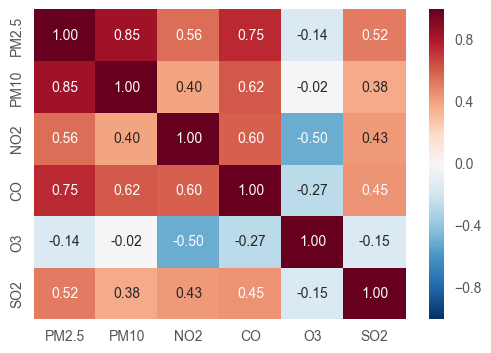

In [76]:
# 相関関係
_air_1 = air_1[['PM2.5','PM10','NO2','CO','O3','SO2']]
## 相関行列の生成 
corr = _air_1.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values, annot=True, fmt=".2f")

In [74]:
corr

,PM2.5,PM10,NO2,CO,O3,SO2
PM2.5,1.000000,0.850027,0.558195,0.753246,-0.142547,0.515851
PM10,0.850027,1.000000,0.399688,0.618041,-0.022765,0.379113
NO2,0.558195,0.399688,1.000000,0.595542,-0.497505,0.434892
CO,0.753246,0.618041,0.595542,1.000000,-0.267064,0.448478
O3,-0.142547,-0.022765,-0.497505,-0.267064,1.000000,-0.147803
SO2,0.515851,0.379113,0.434892,0.448478,-0.147803,1.000000


In [79]:
# 48時間前のデータを作成
air_2 = air_1
air_2['time_48'] = air_2['bjn_time'] + offsets.Day(-2)

In [81]:
_air_2 = air_2[['stationId','bjn_time','PM2.5','PM10','NO2','CO','O3','SO2']]

In [84]:
_air_2.columns = ['stationId','time_48','PM2.5_48','PM10_48','NO2_48','CO_48','O3_48','SO2_48']

In [88]:
air_22 = pd.merge(air_2, _air_2, on=['stationId', 'time_48'])

In [90]:
air_22.head()

,stationId,utc_time,bjn_time,PM2.5,PM10,NO2,CO,O3,SO2,time_48,PM2.5_48,PM10_48,NO2_48,CO_48,O3_48,SO2_48
0,aotizhongxin_aq,2017-01-03 14:00:00,2017-01-03 22:00:00+08:00,483.0,NaN,200.0,8.2,3.0,12.0,2017-01-01 22:00:00+08:00,453.0,467.0,156.0,7.2,3.0,9.0
1,aotizhongxin_aq,2017-01-03 15:00:00,2017-01-03 23:00:00+08:00,447.0,476.0,196.0,8.7,3.0,11.0,2017-01-01 23:00:00+08:00,417.0,443.0,143.0,6.8,2.0,8.0
2,aotizhongxin_aq,2017-01-03 16:00:00,2017-01-04 00:00:00+08:00,440.0,493.0,188.0,8.9,2.0,10.0,2017-01-02 00:00:00+08:00,395.0,467.0,141.0,6.9,3.0,8.0
3,aotizhongxin_aq,2017-01-03 17:00:00,2017-01-04 01:00:00+08:00,463.0,502.0,190.0,8.6,2.0,9.0,2017-01-02 01:00:00+08:00,420.0,484.0,139.0,7.4,3.0,9.0
4,aotizhongxin_aq,2017-01-03 18:00:00,2017-01-04 02:00:00+08:00,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-02 02:00:00+08:00,453.0,520.0,157.0,7.6,4.0,9.0


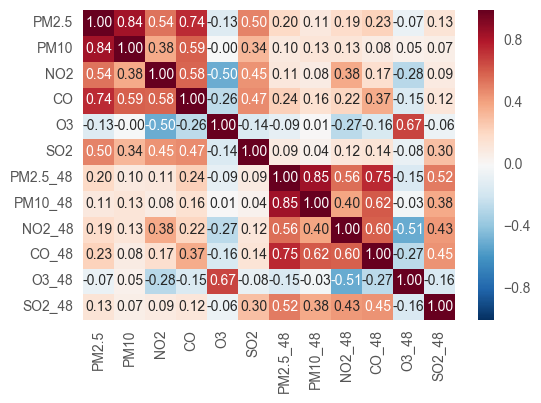

In [92]:
# 相関関係
_air_22 = air_22[['PM2.5','PM10','NO2','CO','O3','SO2','PM2.5_48','PM10_48','NO2_48','CO_48','O3_48','SO2_48']]
## 相関行列の生成 
corr = _air_22.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values, annot=True, fmt=".2f")

In [131]:
air_1.describe()

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PM2.5,PM10,NO2,CO,O3,SO2
count,290621.000000,227747.000000,292359.000000,268197.000000,290589.000000,292462.000000
mean,58.785570,88.059259,45.792457,0.960677,55.692755,8.981003
std,66.113851,89.292875,32.065045,1.001856,53.821424,11.702594
min,2.000000,5.000000,1.000000,0.100000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,1004.000000,3000.000000,300.000000,15.000000,504.000000,307.000000


In [97]:
# 季節別の汚染物質の分布を可視化
_sta_1 = sta_1[['station','type']]
_sta_1.columns = ['stationId', 'type']

In [99]:
air_3 = pd.merge(air_1, _sta_1, on=['stationId'])

In [106]:
air_3['month'] = pd.DatetimeIndex(air_3['bjn_time']).month

## PM2.5 

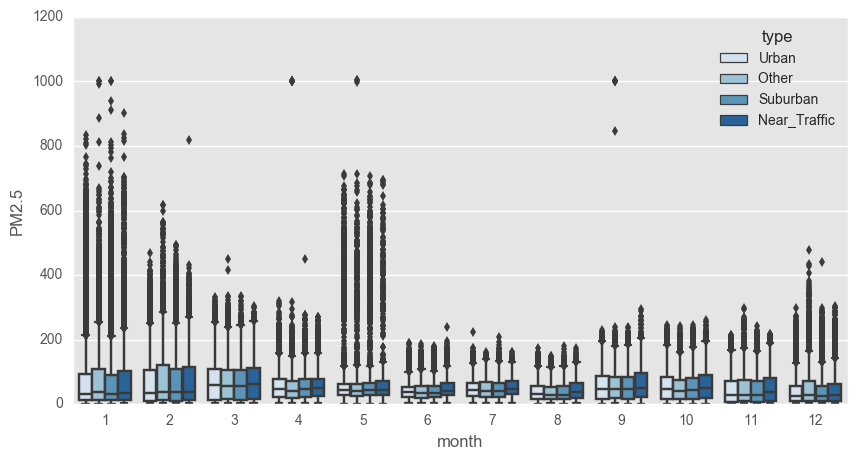

In [127]:
# boxplot
fig = plt.figure(figsize=(10,5),dpi=200)
sns.boxplot(x='month', y="PM2.5", hue='type', data=air_3, palette="Blues")

★外れ値がものすごい！

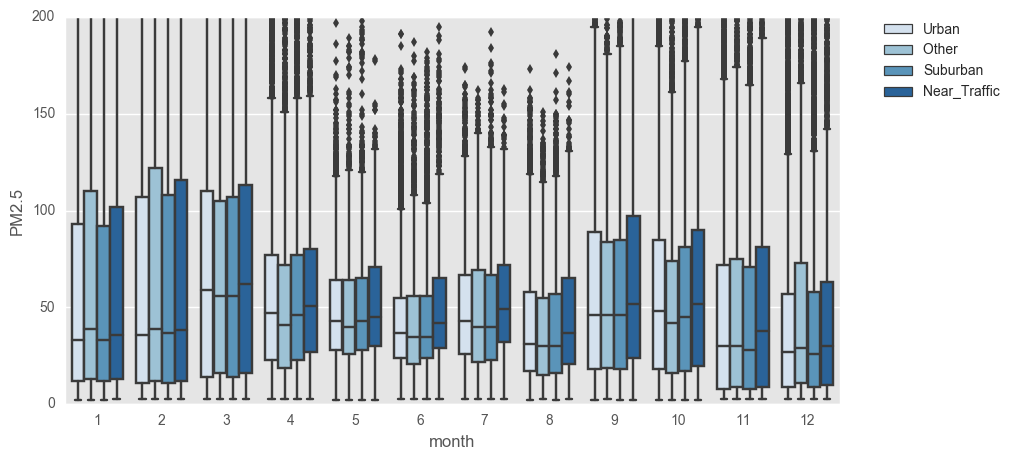

In [128]:
fig = plt.figure(figsize=(10,5),dpi=200)
sns.boxplot(x='month', y="PM2.5", hue='type', data=air_3, palette="Blues")
plt.ylim(0, 200)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

## PM10 

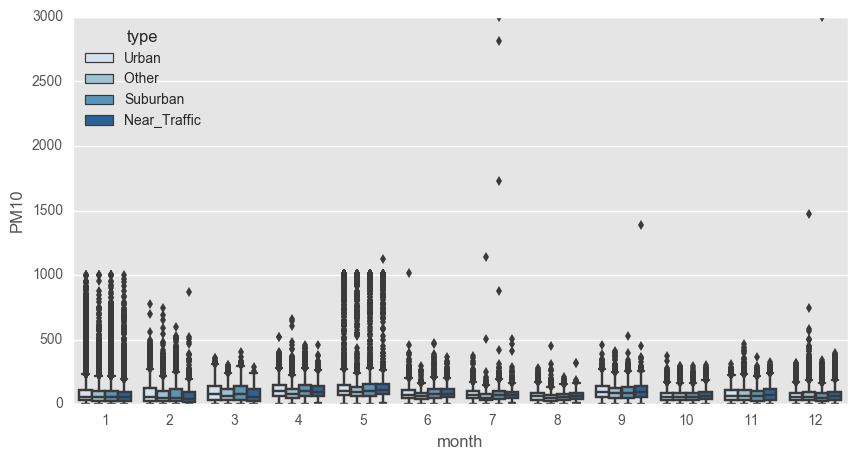

In [130]:
fig = plt.figure(figsize=(10,5),dpi=200)
sns.boxplot(x='month', y="PM10", hue='type', data=air_3, palette="Blues")

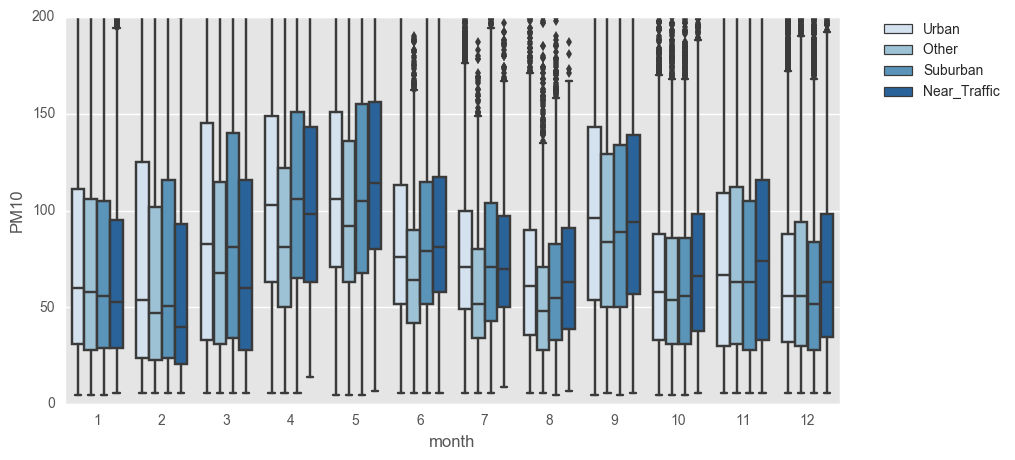

In [132]:
fig = plt.figure(figsize=(10,5),dpi=200)
sns.boxplot(x='month', y="PM10", hue='type', data=air_3, palette="Blues")
plt.ylim(0, 200)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

## O3 

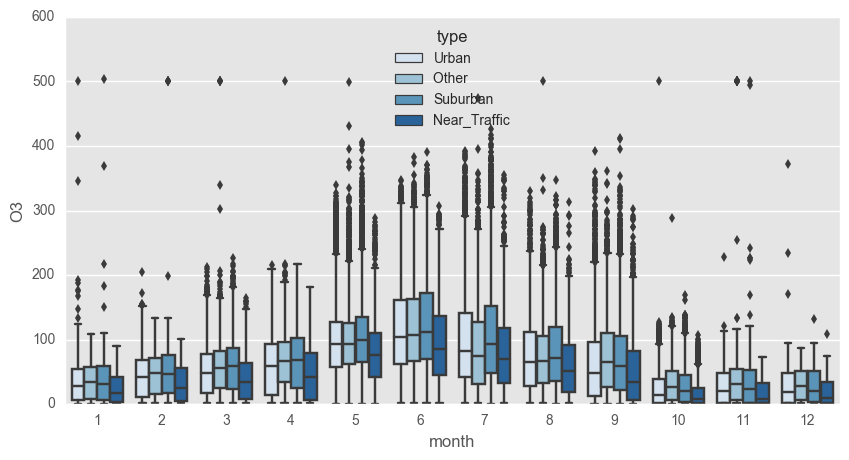

In [133]:
# boxplot
fig = plt.figure(figsize=(10,5),dpi=200)
sns.boxplot(x='month', y="O3", hue='type', data=air_3, palette="Blues")

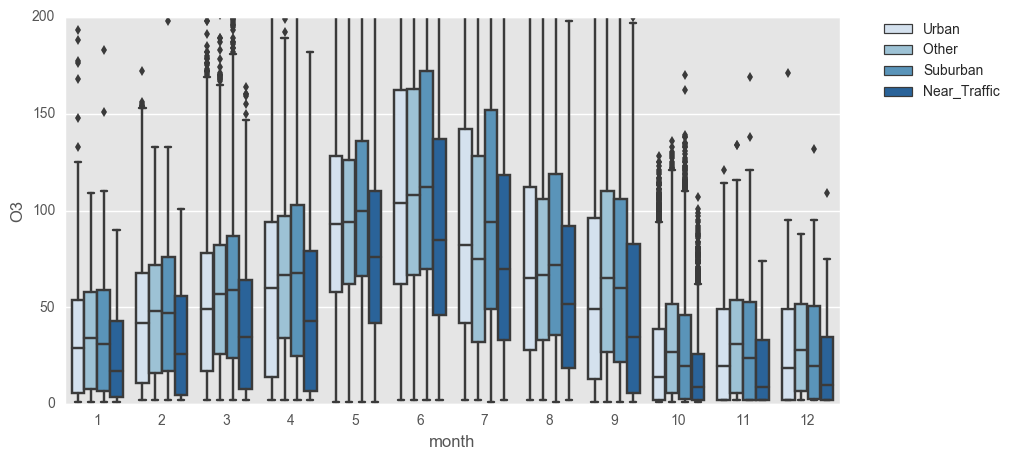

In [134]:
fig = plt.figure(figsize=(10,5),dpi=200)
sns.boxplot(x='month', y="O3", hue='type', data=air_3, palette="Blues")
plt.ylim(0, 200)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

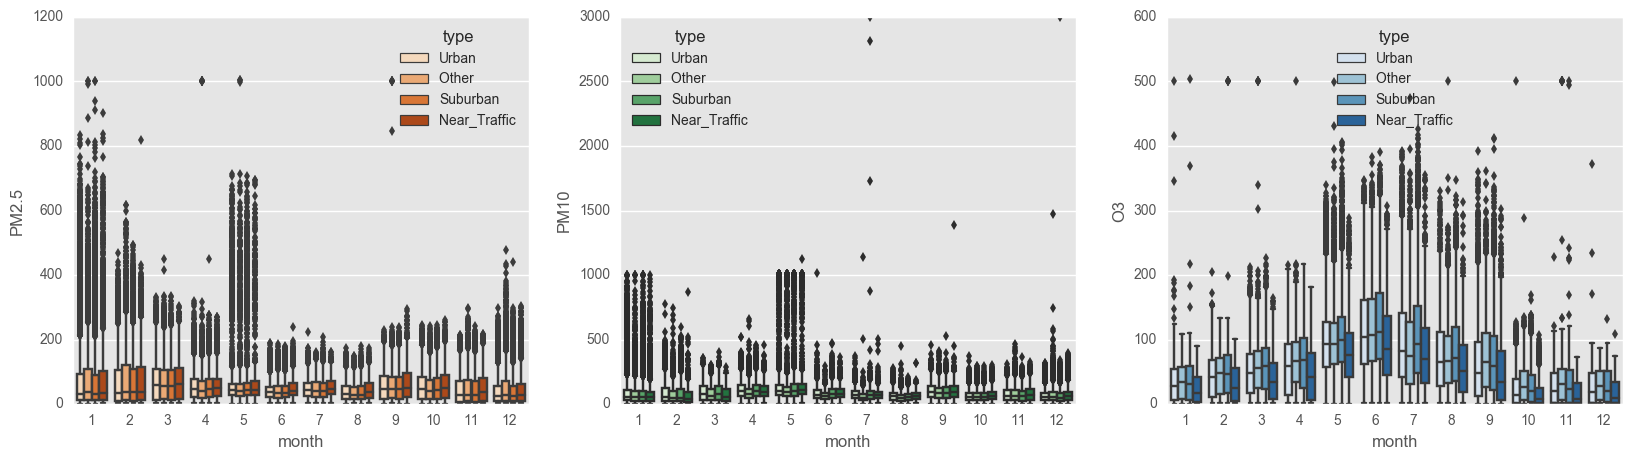

In [161]:
fig = plt.figure(figsize=(20,5),dpi=200)
plt.subplot(1, 3, 1)
sns.boxplot(x='month', y="PM2.5", hue='type', data=air_3, palette="Oranges")

plt.subplot(1, 3, 2)
sns.boxplot(x='month', y="PM10", hue='type', data=air_3, palette="Greens")

plt.subplot(1, 3, 3)
sns.boxplot(x='month', y="O3", hue='type', data=air_3, palette="Blues")

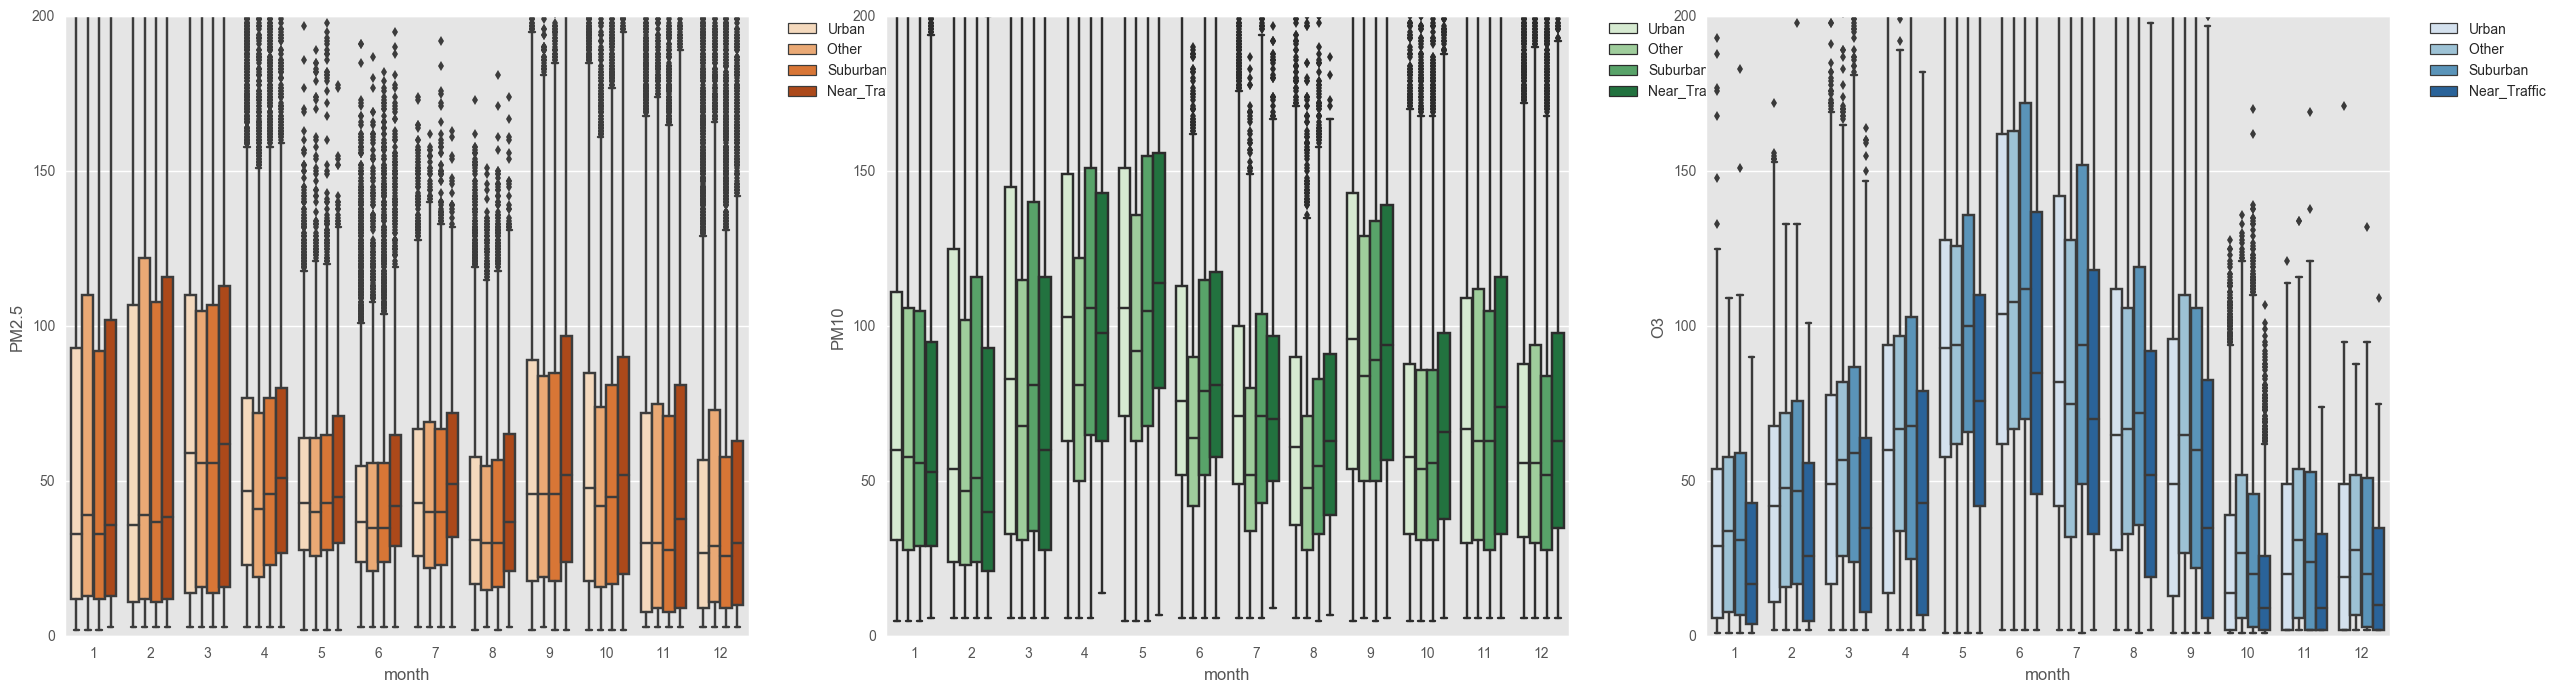

In [162]:
fig = plt.figure(figsize=(30,8),dpi=200)
plt.subplot(1, 3, 1)
sns.boxplot(x='month', y="PM2.5", hue='type', data=air_3, palette="Oranges")
plt.ylim(0, 200)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

plt.subplot(1, 3, 2)
sns.boxplot(x='month', y="PM10", hue='type', data=air_3, palette="Greens")
plt.ylim(0, 200)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

plt.subplot(1, 3, 3)
sns.boxplot(x='month', y="O3", hue='type', data=air_3, palette="Blues")
plt.ylim(0, 200)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

# Weather Data 

The Mereological (Weather) Data contains the following fields:
<br><br>
<b>weather</b> indicates the weather type around a given weather station at a given timestamp. The weather type contains the following possibilities:
<br><br>
Sunny<br>
Clear<br>
Mostly Sunny<br>
Mostly Clear<br>
Cloudy<br>
Partly Cloudy<br>
Overcast<br>
Showers<br>
Scattered Showers<br>
Light Showers<br>
Heavy Showers<br>
Snow Showers<br>
Light Snow Showers<br>
Fog<br>
Freezing Fog<br>
Sandstorm<br>
Dust<br>
Dust Storm<br>
Sand<br>
Heavy Sandstorm<br>
Haze<br>
Thundershower<br>
Lightning<br>
Thunderstorm<br>
Thundershower with Hail<br>
Hail<br>
Needle Ice<br>
Icy<br>
Sleet<br>
Light Rain<br>
Rain<br>
Heavy Rain<br>
Rainstorm<br>
Heavy Rainstorm<br>
Extreme Rainstorm<br>
Light Snow<br>
Snow<br>
Heavy Snow<br>
Blizzard<br>
Freezing Rain<br>
<br>

<b>temperature</b> is measured with a thermometer in a weather station. The temperature data of Beijing is in centigrade scale (°C).
<br><br>
<b>pressure</b>, or atmospheric pressure, is the force per unit area exerted by the weight of the air. The unit is hectopascal or hPa (1 hPa = 100 Pa).
<br><br>
<b>humidity</b> is the measure of the amount of water vapor present in the air. The unit of humidity is the percentage (%).
<br><br>
<b>wind_speed</b>, or speed of the wind, is measured by anemometers in weather stations instrument. The unit of wind speed is meter per second (m/s).
<br><br>
<b>wind_direction</b>, or wind direction, is the direction from which it originates. For example, a northerly wind blows from the north to the south. Wind direction is measured in degrees clockwise from due north and so a wind coming from the south has a wind direction of 180 degrees; one from the east is 90 degrees, etc. If the wind speed is less than 0.5m/s (nearly no wind), the value of the wind_direction is 999017.

In [164]:
met_1.weather.value_counts()

Sunny/clear            118091
Haze                    27001
Fog                     10911
Rain                     1620
Dust                      183
Snow                      162
Sand                       61
Sleet                      12
Rain with Hail              3
Rain/Snow with Hail         3
Name: weather, dtype: int64

In [165]:
met_1.describe()

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,longitude,latitude,temperature,pressure,humidity,wind_direction,wind_speed
count,158047.000000,158047.000000,158047.000000,158047.000000,158047.000000,157813.000000,157813.000000
mean,116.395672,40.047275,38.182775,1026.798200,354.312894,35487.471178,96.933881
std,0.395223,0.264798,5030.694816,5025.748455,17423.723518,184454.823456,9748.857634
min,115.692222,39.718611,-21.300000,940.000000,4.000000,0.000000,0.000000
25%,116.194167,39.847500,2.500000,994.200000,27.000000,NaN,NaN
50%,116.290556,39.973889,13.800000,1005.600000,48.000000,NaN,NaN
75%,116.626944,40.223333,23.200000,1016.900000,73.000000,NaN,NaN
max,117.117778,40.658889,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000


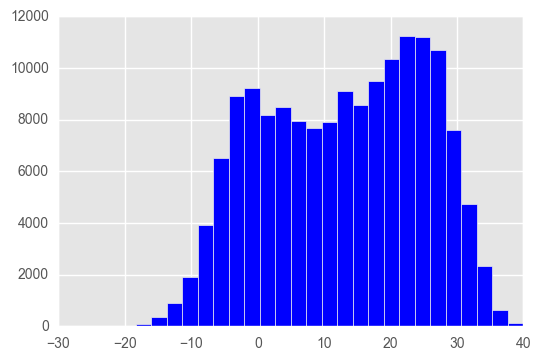

In [178]:
#temprature
met_1['temperature'].hist(bins=30, range=(-30,40), color="blue")

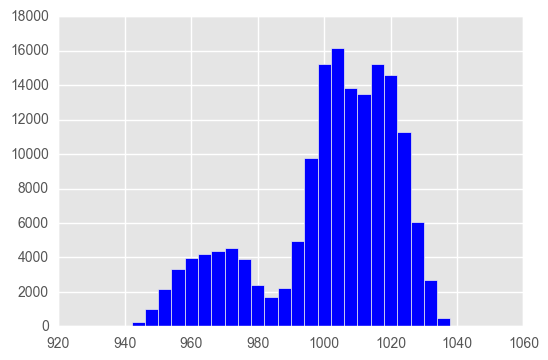

In [181]:
#temprature
met_1['pressure'].hist(bins=30, range=(930,1050), color="blue")

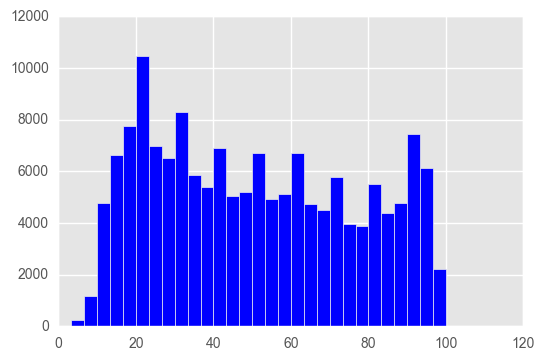

In [189]:
#humidity
met_1['humidity'].hist(bins=30, range=(0,100), color="blue")

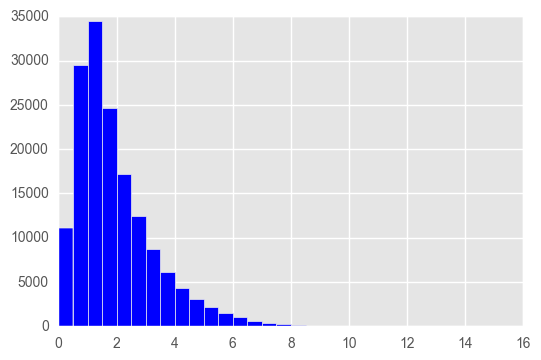

In [188]:
#wind_speed
met_1['wind_speed'].hist(bins=30, range=(0,15), color="blue")

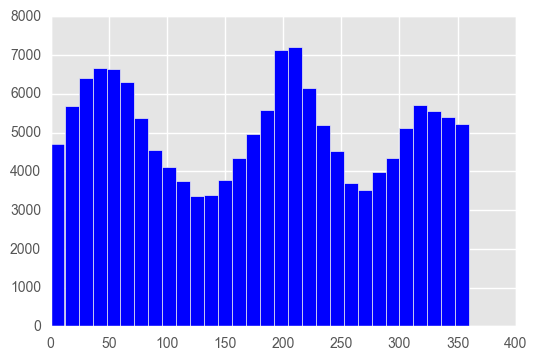

In [191]:
#wind_speed
met_1['wind_direction'].hist(bins=30, range=(0,360), color="blue")